# Import necessary packages

In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline
from adjustText import adjust_text

plt.style.use('default')

# Load single cell data

In [6]:
data = pd.read_csv("temporal_data_ready_normalized.csv", index_col=0)
data = data.dropna(axis=0)

columns = data.columns

genes = np.array([name.split("_")[0] for name in list(data.index)])
cells = np.array(["_".join(name.split("_")[1:]) for name in list(data.index)])

enc_genes = LabelEncoder()
enc_cells = LabelEncoder()

enc_genes.fit(genes)
enc_cells.fit(cells)

X = data.values[:, np.newaxis, :]
y_genes = enc_genes.transform(genes)
y_cells = enc_cells.transform(cells)

X.shape, y_genes.shape, y_cells.shape, genes.shape, cells.shape

((22000, 1, 6), (22000,), (22000,), (22000,), (22000,))

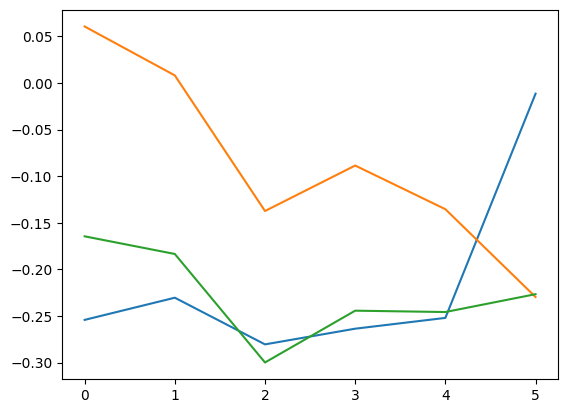

In [7]:
plt.plot(X[0, 0])
plt.plot(X[1, 0])
plt.plot(X[2, 0])
plt.show()

<Axes: ylabel='Count'>

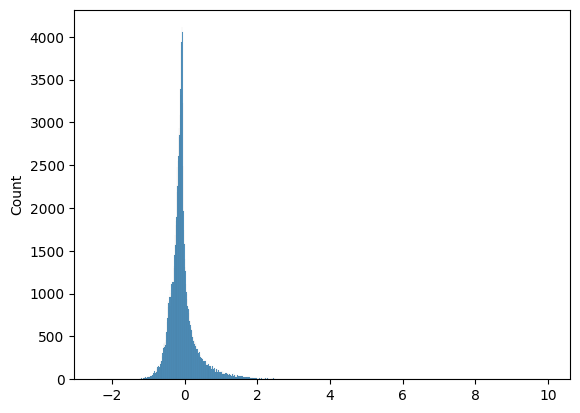

In [8]:
sns.histplot(X.ravel())

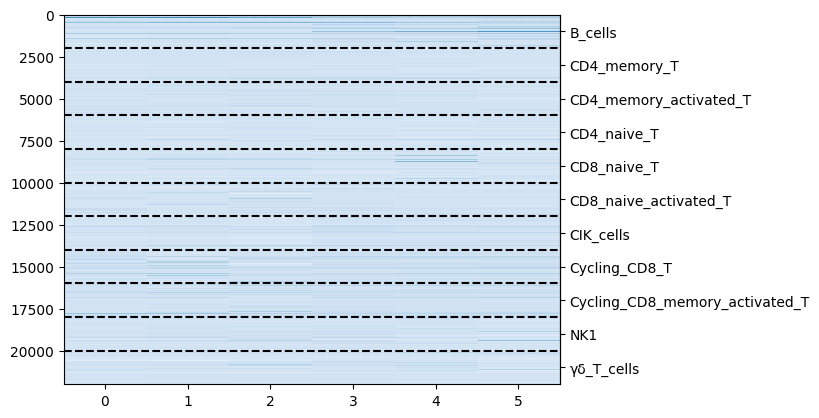

In [9]:
plt.imshow(X[:, 0][np.argsort(cells)], cmap="Blues", aspect="auto", interpolation='none')

secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

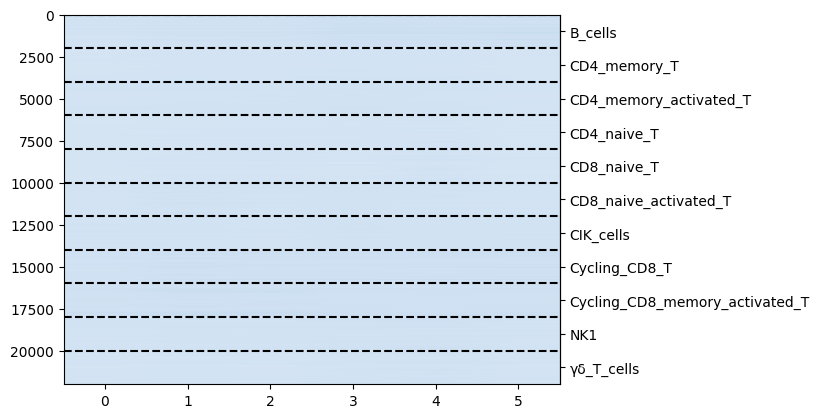

In [10]:
plt.imshow(X[:, 0][np.argsort(cells)], cmap="Blues", aspect="auto",)

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

## PCA on the original data

In [11]:
from sklearn.decomposition import PCA

In [12]:
pca = PCA(n_components=2, random_state=0)

In [13]:
X_pca = pca.fit_transform(X[:, 0])

<Axes: >

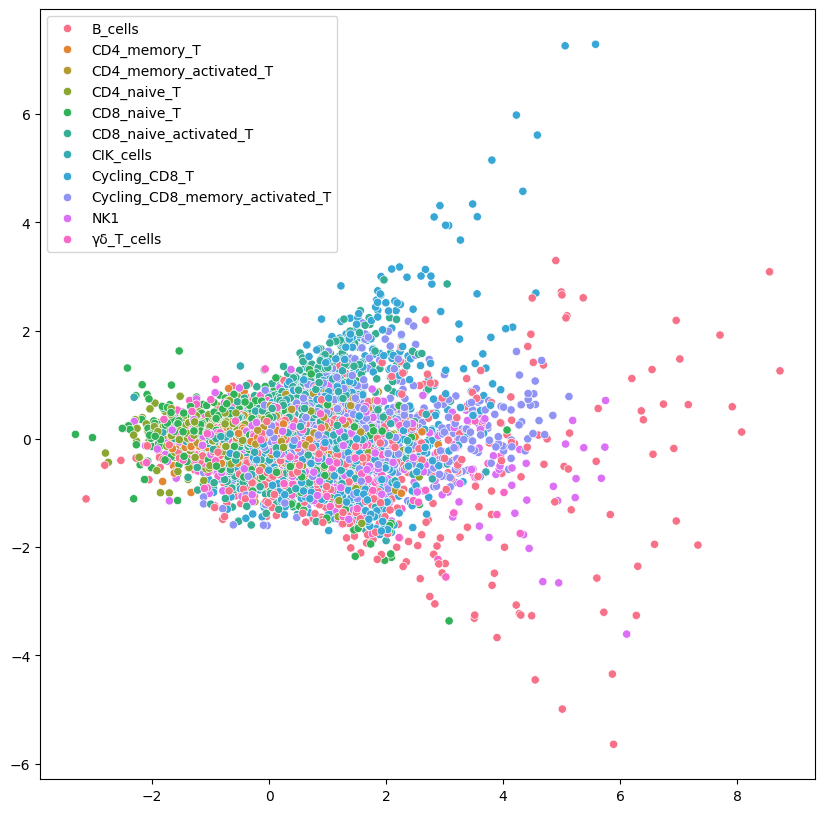

In [14]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells)

## Shapelets

In [15]:
from aeon.transformations.collection.shapelet_based import RandomDilatedShapeletTransform

In [16]:
trf = RandomDilatedShapeletTransform(shapelet_lengths=[2,4], max_shapelets=100, n_jobs=-2)

In [17]:
%%time
X_transformed = trf.fit_transform(X)

CPU times: user 42.5 s, sys: 918 ms, total: 43.4 s
Wall time: 36.9 s


In [18]:
X_transformed_sorted = X_transformed[np.argsort(cells)]
X_transformed_sorted = X_transformed_sorted[:, np.argsort(X_transformed[np.argsort(cells)].mean(axis=0).ravel())[::-1]]
X_transformed_sorted.shape

(22000, 300)

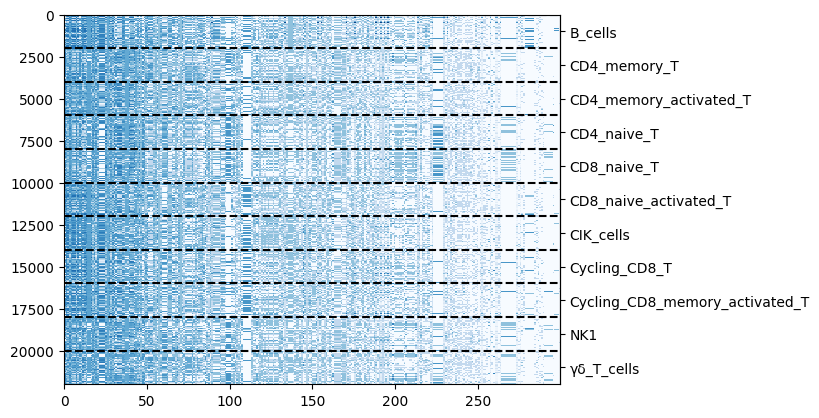

In [19]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto", interpolation='none')

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

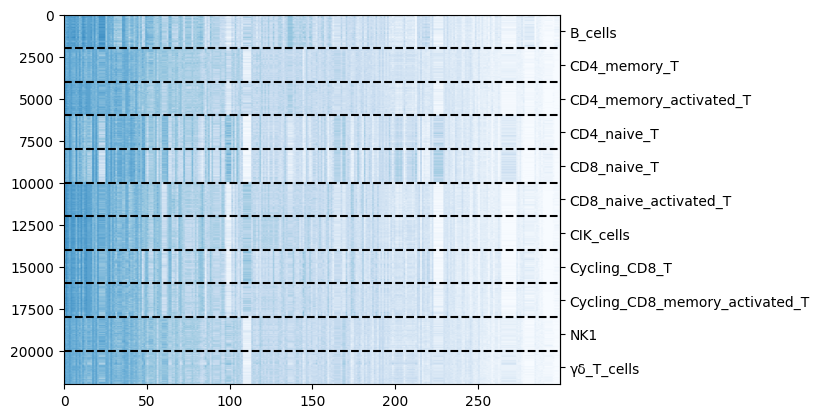

In [20]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto")

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

### PCA on the shapelet transformed data

In [21]:
pca = PCA(n_components=2, random_state=0)

In [22]:
X_pca = pca.fit_transform(X_transformed)

<Axes: >

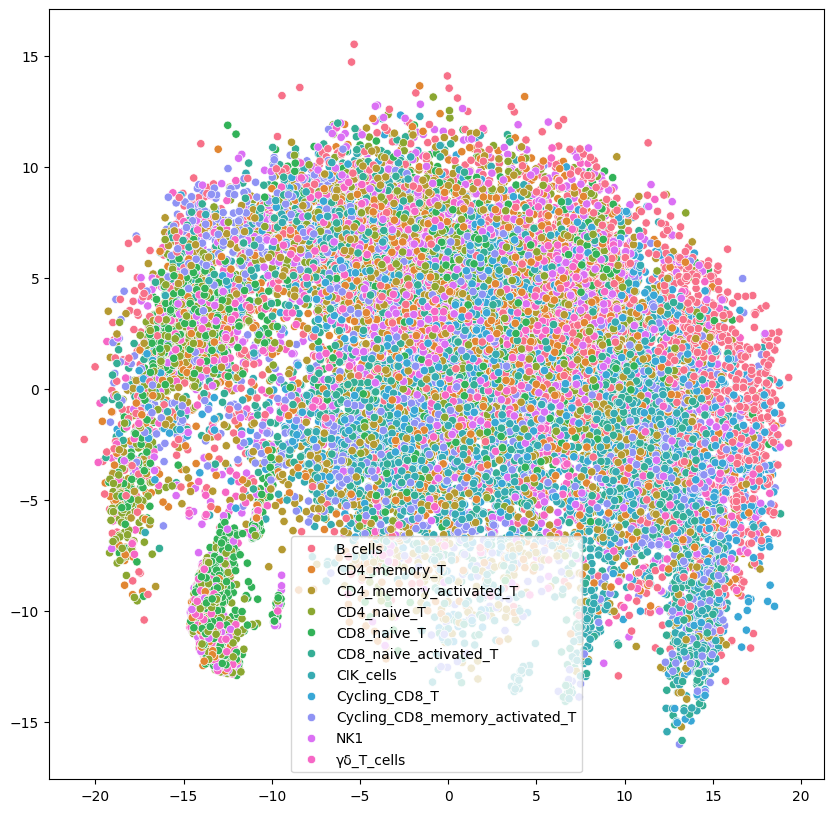

In [23]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells)

## BORF

In [24]:
from aeon.transformations.collection.dictionary_based import BORF

In [25]:
trf = BORF(n_jobs=-2, window_size_min_window_size=2, alphabets_min_symbols=3, alphabets_max_symbols=4, min_window_to_signal_std_ratio=0.0)

In [26]:
%%time
X_transformed = trf.fit_transform(X)

CPU times: user 451 ms, sys: 1.33 s, total: 1.78 s
Wall time: 25.3 s


In [27]:
X_transformed_sorted = X_transformed.toarray()[np.argsort(cells)]
X_transformed_sorted = X_transformed_sorted[:, np.argsort(X_transformed.toarray()[np.argsort(cells)].mean(axis=0).ravel())[::-1]]
X_transformed_sorted.shape

(22000, 64)

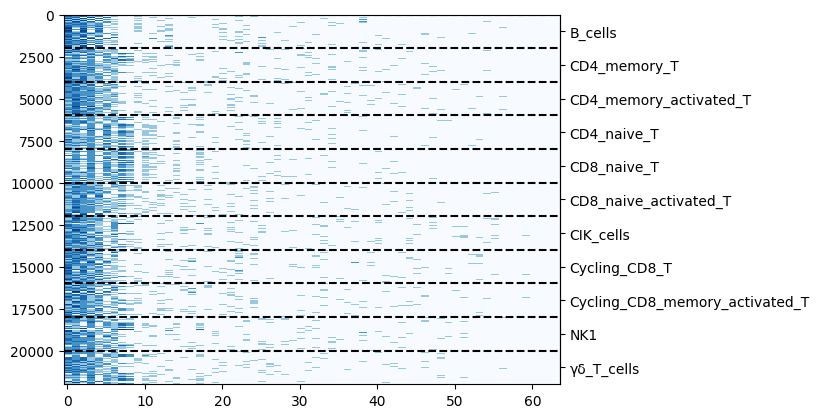

In [28]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto", interpolation='none')

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

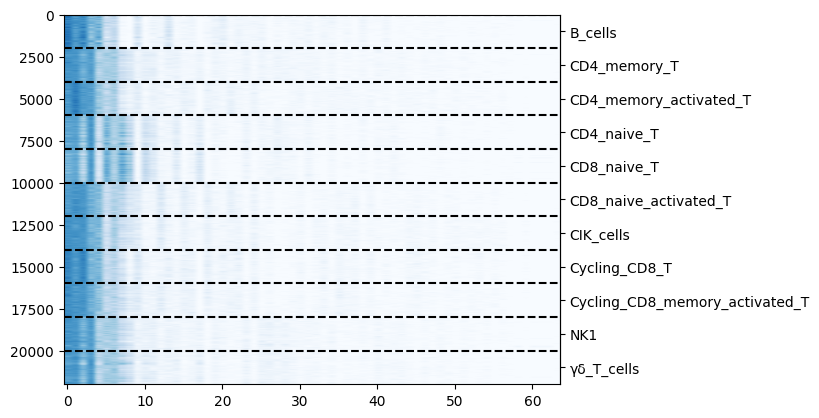

In [29]:
plt.imshow(np.log1p(X_transformed_sorted), cmap="Blues", aspect="auto")

# plt.axhline(y=i, color='k', linestyle='--')
secax = plt.gca().secondary_yaxis('right')  # Adds a secondary x-axis at the top
secax.set_yticks(np.arange(0, len(cells), 2000)+1000)  # Set ticks every 2000
secax.set_yticklabels(cells[np.argsort(cells)][::2000])

for i in range(0, len(cells), 2000):
    plt.axhline(y=i, color='k', linestyle='--')

### PCA on the BORF transformed data

In [30]:
pca = make_pipeline(PCA(n_components=2, random_state=0))

In [31]:
X_pca = pca.fit_transform(X_transformed.toarray())

In [47]:
texts

[Text(-3.18343842378777, 5.552127103676705, 'AC010983.1'),
 Text(-3.1842228487428224, 5.552127103676705, 'AC017002.3'),
 Text(-3.5833450630625405, 3.836278156567932, 'AC068413.1'),
 Text(-3.582560638107488, 3.836278156567932, 'AC068633.1'),
 Text(-3.55196806486045, 3.836278156567932, 'ADGRG3'),
 Text(-3.5896204627029586, 3.836278156567932, 'AL050403.2'),
 Text(-3.3965728053967417, -3.3578753090197524, 'AL590006.1'),
 Text(-3.2556055196525784, 5.552127103676705, 'ALPK2'),
 Text(-3.5864827628827496, 3.836278156567932, 'AP000676.5'),
 Text(-3.4860763686360596, 3.836278156567932, 'ASAP2'),
 Text(-3.4923517682764778, 3.836278156567932, 'CAVIN3'),
 Text(-3.5484350498045765, -2.8696723503857835, 'CCR6'),
 Text(-3.6108633468633466, -3.0157009353224615, 'CD79B'),
 Text(-3.480585393950694, 3.836278156567932, 'CDCP1'),
 Text(-3.6140010466835557, -3.0157009353224615, 'CEBPD'),
 Text(-3.4572992262811764, -3.273374652713038, 'CEMIP2'),
 Text(-3.5746372701936058, -3.3578753090197524, 'CLIC3'),
 Text(

Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


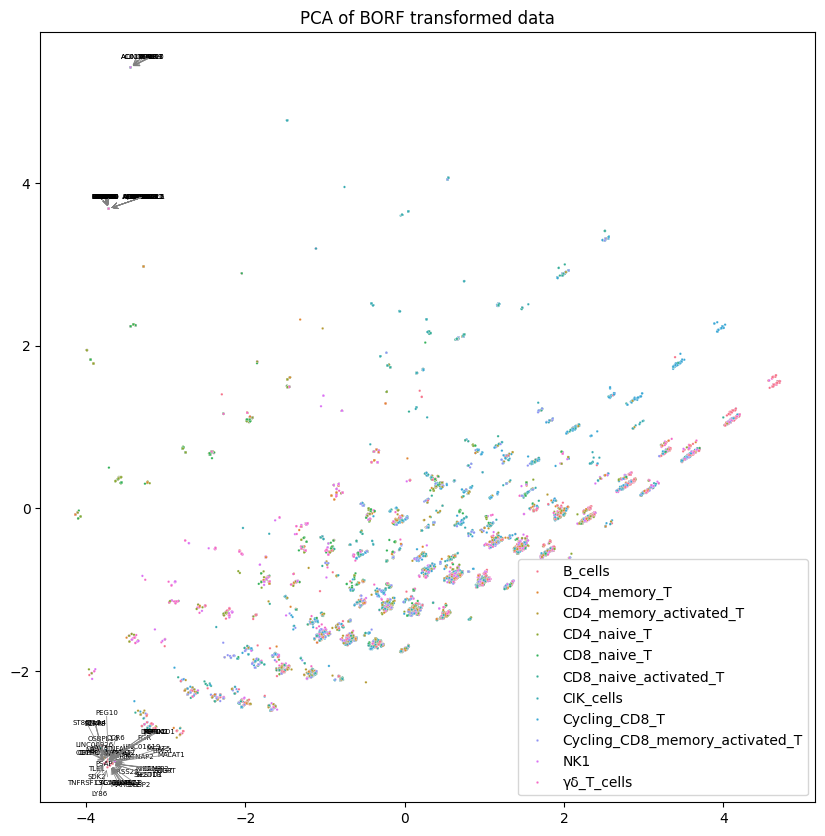

In [49]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cells, s=3)

texts = []
for i in range(len(X_pca)):
  if np.abs(X_pca[i, 0]) > 3 and np.abs(X_pca[i, 1]) > 3:  # Consider points with PCA values greater than 2 as outliers
    texts.append(plt.text(X_pca[i, 0], X_pca[i, 1], str(genes[i]), fontsize=5))  # Reduced fontsize to 5

# Adjust the text positions with expanded repulsion settings
adjust_text(
    texts, 
    expand_text=(1.5, 1.5),     # Increase expansion around the text
    expand_points=(2, 2),       # Increase expansion around points
    force_text=0.5,             # Additional force to push text away from each other
    force_points=0.5,           # Additional force to push text away from points
    arrowprops=dict(arrowstyle='->', color='grey', lw=0.5)  # Optionally add arrows
)

plt.title('PCA of BORF transformed data')
plt.show()